In [4]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
data = pd.read_csv("diabetes_symptoms_dataset.csv")
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


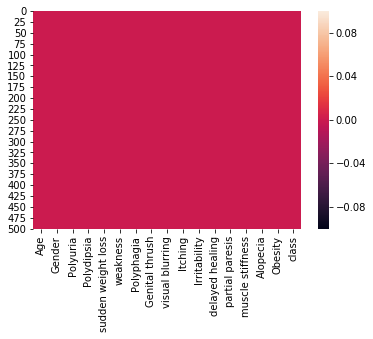

In [6]:
sns.heatmap(data.isnull())

In [7]:
{column: len(data[column].unique()) for column in data.columns}

{'Age': 51,
 'Gender': 2,
 'Polyuria': 2,
 'Polydipsia': 2,
 'sudden weight loss': 2,
 'weakness': 2,
 'Polyphagia': 2,
 'Genital thrush': 2,
 'visual blurring': 2,
 'Itching': 2,
 'Irritability': 2,
 'delayed healing': 2,
 'partial paresis': 2,
 'muscle stiffness': 2,
 'Alopecia': 2,
 'Obesity': 2,
 'class': 2}

In [8]:
def preprocess_inputs(df):
    #df = df.copy()
    
    # Binary-encode Gender column
    df.columns = df.columns.str.strip()
    df.columns = df.columns.str.replace(" ", "_")
    one_values = ["Male", "Positive", "Yes"]
    zero_values = ["Female", "Negative", "No"]

    for column in df.columns:
        df[column] = df[column].replace(to_replace=[one_values], value=1)
        df[column] = df[column].replace(to_replace=[zero_values], value=0)
    
    
    
    return df

In [9]:
data = preprocess_inputs(data)

In [10]:
data

,Age,Gender,Polyuria,Polydipsia,sudden_weight_loss,weakness,Polyphagia,Genital_thrush,visual_blurring,Itching,Irritability,delayed_healing,partial_paresis,muscle_stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


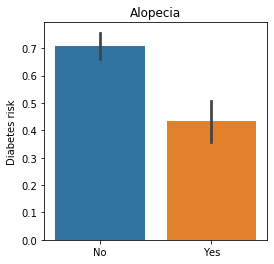

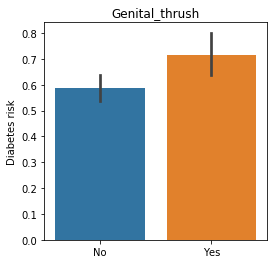

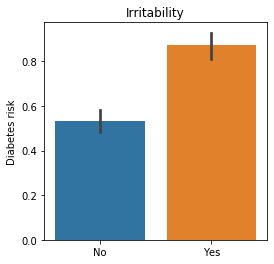

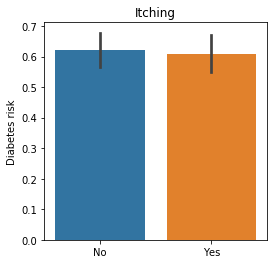

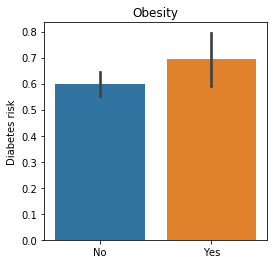

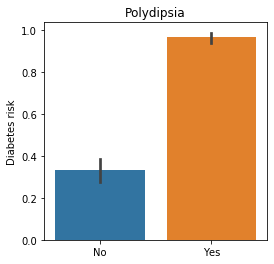

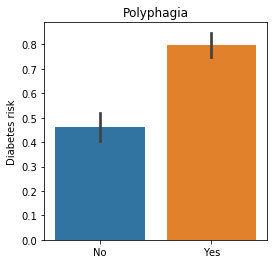

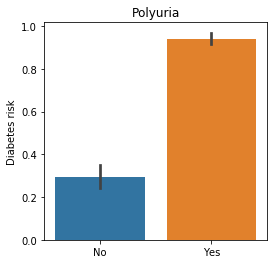

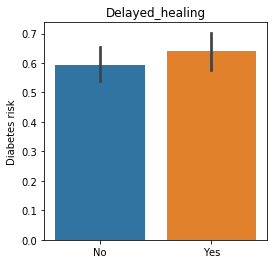

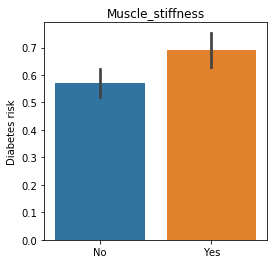

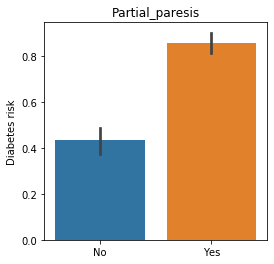

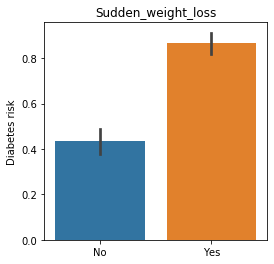

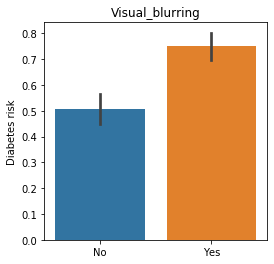

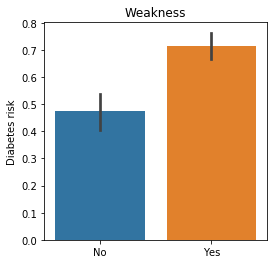

In [11]:
symptoms_data = data[data.columns.difference(["Age", "Gender", "class"])]

for column in  symptoms_data:
    plt.figure(figsize=(4,4))
    ax = sns.barplot(x=column, y="class", data=data)
    ax.set_xticklabels(["No", "Yes"])
    ax.set_ylabel("Diabetes risk")
    ax.set_xlabel(None)
    title = column.capitalize()
    plt.title(title)
    plt.show()

In [12]:
def plotPie(value, title, label):
    plt.figure(figsize=(4,4))
    plt.pie(
        value.value_counts(),
        startangle=90,
        labels = label,
        autopct=(lambda p:f'{p:.2f}%\n{p*sum(value.value_counts())/100 :.0f} items')
    )
    plt.title(title)
    plt.show()


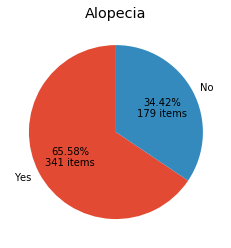

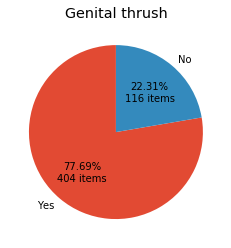

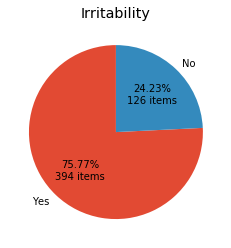

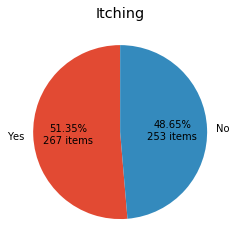

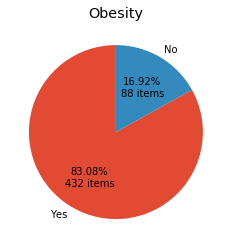

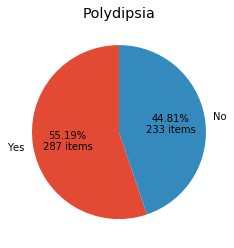

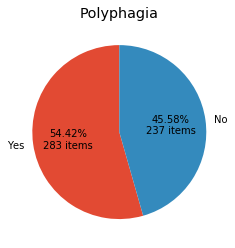

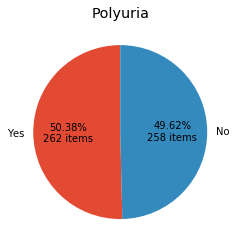

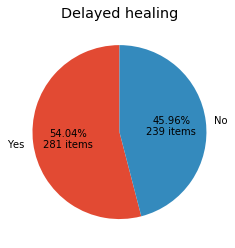

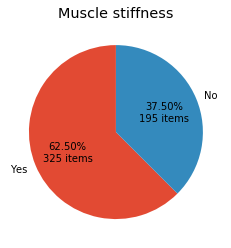

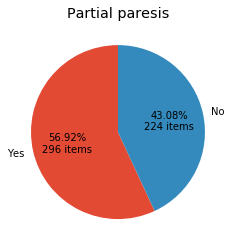

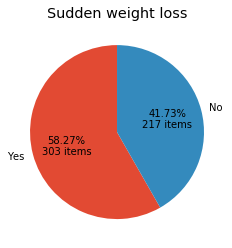

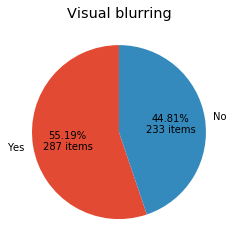

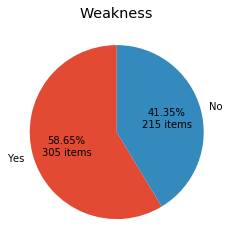

In [34]:
for column in symptoms_data.columns:
    plotPie(symptoms_data[column], column.capitalize(), ["Yes", "No"])

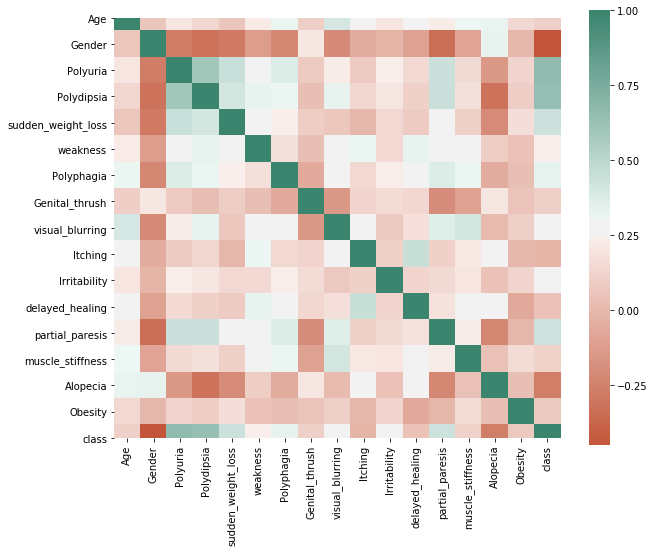

In [13]:
new_data = pd.read_csv("diabetes_symptoms_dataset.csv")
new_data = preprocess_inputs(new_data)
plt.figure(figsize=(10,8))
corr = new_data.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(20, 160, n=256),
    square=True,)

In [14]:
#feature selection with pearson corelation coefficient

feat_corr = data.corr()["class"].to_frame()
feat_corr

,class
Age,0.108679
Gender,-0.449233
Polyuria,0.665922
Polydipsia,0.648734
sudden_weight_loss,0.436568
weakness,0.243275
Polyphagia,0.342504
Genital_thrush,0.110288
visual_blurring,0.251300
Itching,-0.013384


In [15]:
# Sort values with highest correlation
feat_corr["class"] = abs(feat_corr["class"])
feat_corr = feat_corr.sort_values(by="class", ascending=False).reset_index(drop=False)
feat_corr = feat_corr[1:11]["index"].to_numpy()
feat_corr

array(['Polyuria', 'Polydipsia', 'Gender', 'sudden_weight_loss',
       'partial_paresis', 'Polyphagia', 'Irritability', 'Alopecia',
       'visual_blurring', 'weakness'], dtype=object)

In [16]:

x = data[feat_corr]
y = data["class"]

(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size = 0.2, random_state=1)


sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train

array([[-1.        , -0.88623232,  0.7666722 , ..., -0.73923501,
        -0.86906517, -1.20293758],
       [ 1.        ,  1.1283723 , -1.30433842, ..., -0.73923501,
         1.1506617 ,  0.83129833],
       [ 1.        , -0.88623232, -1.30433842, ...,  1.35274978,
        -0.86906517, -1.20293758],
       ...,
       [-1.        , -0.88623232, -1.30433842, ..., -0.73923501,
        -0.86906517, -1.20293758],
       [-1.        , -0.88623232,  0.7666722 , ..., -0.73923501,
        -0.86906517, -1.20293758],
       [ 1.        ,  1.1283723 ,  0.7666722 , ...,  1.35274978,
         1.1506617 ,  0.83129833]])

In [17]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "K-Nearest Neighbours" : KNeighborsClassifier(),
    "Random Forest" : RandomForestClassifier() 
}

for name, model in models.items():
    model.fit(x_train, y_train)
    print(name+" trained")

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression trained
K-Nearest Neighbours trained
Random Forest trained


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [18]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(x_test, y_test) * 100))

Logistic Regression: 90.38%
K-Nearest Neighbours: 91.35%
Random Forest: 96.15%


In [34]:
data

,Age,Gender,Polyuria,Polydipsia,sudden_weight_loss,weakness,Polyphagia,Genital_thrush,visual_blurring,Itching,Irritability,delayed_healing,partial_paresis,muscle_stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [37]:
print('Polyuria, Polydipsia,Gender, sudden_weight_loss, partial_paresis, Polyphagia, Irritability, Alopecia, visual_blurring, weakness')
new_input = [[0,1,1,0,1,0,0,1,0,1]]
#print(new_input)

for name,model in models.items():
    result = model.predict(new_input)
    print(name+":")
    if(result == 1):
        print("Positive")
    else:
        print("Negative")
    print("\n")
    
for name,model in models.items():
    if(name == 'Random Forest'):
        result = model.predict(new_input)
        #print(result)
        if(result==1):
            print("You are at a risk of diabetes")
            print("Here are some precautions we suggest you to take seriously:\nLose extra weight and be more physically active")
            print("Eat healthy plant foods and healthy fats\nSkip fad diets and make healthier choices\nDrink plenty of water")
            print("Cut sugar and refined carbohydrates from your diet")

print("\n*We are not replacing doctors. We strongly recommend doctor's consultation if you are facing serious diabetic symptoms*")
    

Polyuria, Polydipsia,Gender, sudden_weight_loss, partial_paresis, Polyphagia, Irritability, Alopecia, visual_blurring, weakness
Logistic Regression:
Positive


K-Nearest Neighbours:
Positive


Random Forest:
Positive


You are at a risk of diabetes
Here are some precautions we suggest you to take seriously:
Lose extra weight and be more physically active
Eat healthy plant foods and healthy fats
Skip fad diets and make healthier choices
Drink plenty of water
Cut sugar and refined carbohydrates from your diet

*We are not replacing doctors. We strongly recommend doctor's consultation if you are facing serious diabetic symptoms*


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


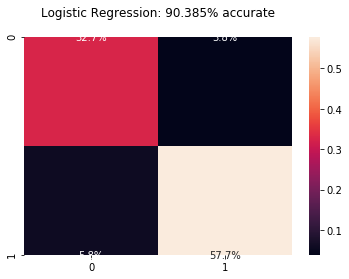

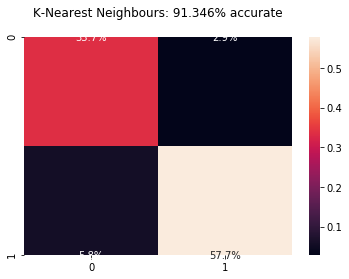

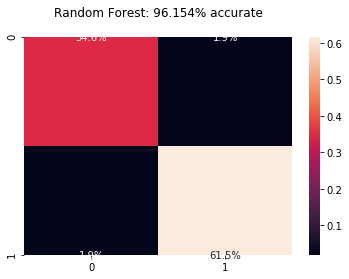

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix


results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    confuse = confusion_matrix(y_test, predict)
    accur = accuracy_score(y_test, predict)
    results[name] = accur * 100.0
    
    title = name + ": " + "{:.3f}%".format(accur*100) + " accurate\n"
    
    ax = sns.heatmap(confuse/np.sum(confuse), annot=True, fmt='.1%')
    ax.set_title(title)
    
    
    plt.show()